**1. Mengumpulkan Data**

Cara pengumpulan data yang saya lakukan dengan mendownload dataset dari github yang sudah di sediakan oleh pelaksana. cara lain untuk pengumpulan data bisa menggunakan web scraping, Api,dll.

*Sumber dataset: https://github.com/arubhasy/dataset/blob/main/heart.csv*

Dalam pengolahan data ini saya menggunakan python untuk mengolah data heart.csv dan code editor yang saya gunakan adalah VS Code. 

saya juga memakai beberapa library yang di sediakan oleh python dalam membantu saya membuat prediksi dataset ini.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [2]:
#read data 
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


DATASET STORY

**Age** = usia pasien (tahun)

**sex** = gender pasien(Male , Female )

**ChestPainType** = nyeri dada

    [TA: Typical Angina =  nyeri dada akibat aktivitas fisik ,

    ATA: Atypical Angina = nyeri dada yang tidak berhubungan dengan jantung,

    NAP: Non-Anginal Pain = mengacu pada nyeri yang mungkin dirasakan seseorang tanpa penyakit jantung, 

    ASY: Asymptomatic = kondisi ketika seseorang telah positif menderita suatu penyakit namun tidak menunjukkan gejala klinis apapun]

**RestingBP** = tekanan darah [mm Hg]

**Cholesterol** = kolestrol

**FastingBS** = kadar gula darah puasa [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG** = gula darah, r [1: if FastingBS > 120  mg/dl, 0: otherwise]

**MaxHR** = hasil EKG 

    [Normal:  Normal, 

    ST: Hasil EKG menunjukkan adanya abnormalitas gelombang ST-T. Ini dapat berupa inversi gelombang T atau elevasi/depresi segmen ST > 0.05 mV, 

    LVH: Hasil electrocardiogram menunjukkan adanya hipertrofi ventrikel kiri yang mungkin atau pasti menurut kriteria Estes]

**ExerciseAngina** = max denyut jantung antara 60 - 202

**oldpeak** = ST [Nilai numerik yang diukur pada depresi]

**ST_Slope** = kemiringan segmen ST pada EKG selama puncak latihan. 

    [= Up: upsloping = naik,

    Flat: flat = datar,

    Down: downsloping = turun]

**HeartDisease** = target [1: heart disease, 0: Normal] 


**2. Menelaah Data**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


Type data yang ada pada dataset ini yaitu : float, int, object.
Dengan 12 kolom dan 918 baris data.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,911.0,54.102086,12.988393,0.0,47.00,54.0,60.0,177.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


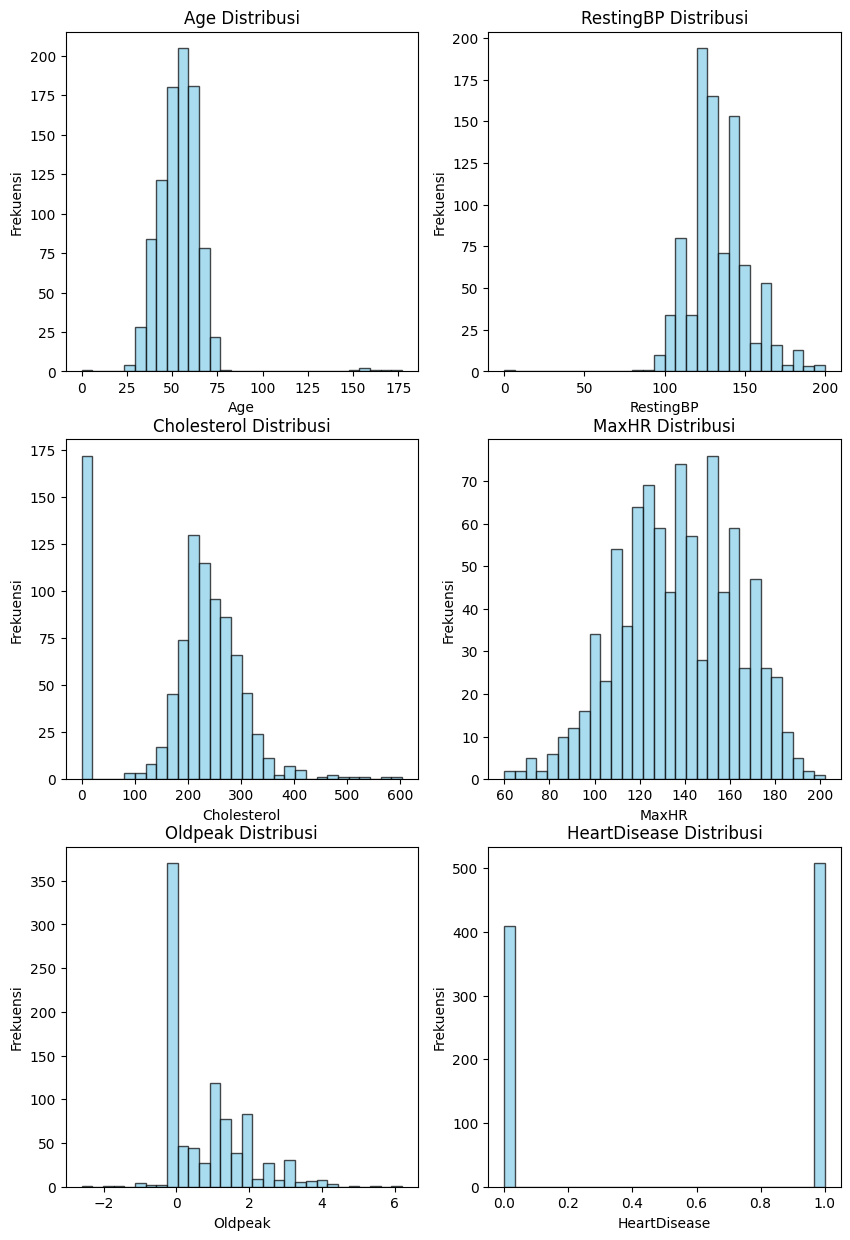

In [5]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol',
                      'MaxHR', 'Oldpeak', 'HeartDisease']

# Plotting histograms
fig, axes = plt.subplots(len(numerical_features) // 2 + len(numerical_features) % 2, 2, figsize=(10, 15))

for i, column in enumerate(numerical_features):
    ax = axes[i // 2, i % 2]
    df[column].plot(kind='hist', bins=30, ax=ax, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'{column} Distribusi')
    ax.set_xlabel(column)
    ax.set_ylabel('Frekuensi')

plt.show()

**3. Memvalidasi Data**

In [6]:
#cek missing value
df.isnull().sum()

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

Terdapat data yang hilang atau missing value pada kolom Age dan Sex. 

In [7]:
#cek data yang duplikat
jumlah_duplikat = df.duplicated().sum()

# Mencetak jumlah data duplikat
print('data duplikat =', jumlah_duplikat)

data duplikat = 0


In [8]:
# Mengisi nilai yang hilang dalam kolom Age dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Mengisi nilai yang hilang dalam kolom Sex dengan mode
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
#mengubah type data pada kolom Age
df['Age'] = df['Age'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 82.6+ KB


**4. Menentukan Objek Data**

In [11]:
# Target Variable
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [12]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

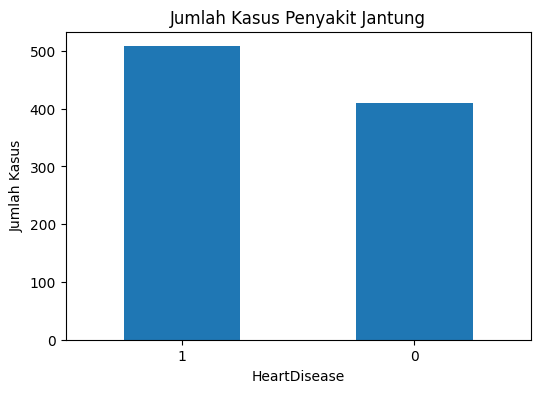

In [13]:
value_counts = df['HeartDisease'].value_counts()

# Membuat plot visualisasi
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar')
plt.title('Jumlah Kasus Penyakit Jantung')
plt.xlabel('HeartDisease')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=0)
plt.show()

Variabel dependent atau Target pada dataset ini yaitu ’HeartDisease’ karena untuk memprediksi apakah seorang pasien mengidap penyakit jantung atau tidak.

**5. Membersihkan Data**

Outliers

In [14]:
# Daftar kolom numerik untuk pemeriksaan outlier
numeric_columns = ['Age', 'RestingBP', 'Cholesterol',
                    'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

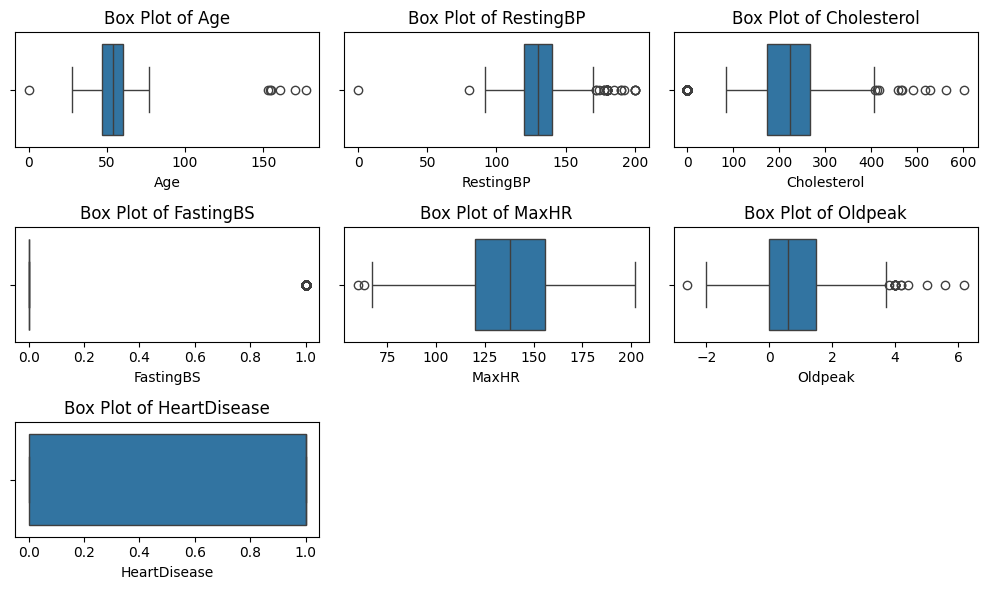

In [15]:
# Deteksi dan cetak outlier untuk setiap kolom numerik
for column in numeric_columns:
    outliers = detect_outliers(df, column)
    #print(f"Outliers in {column}:")
    #print(outliers)
    #print("\n")

# Visualisasi outlier menggunakan box plot
plt.figure(figsize=(10,6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Penanganan outliers

In [16]:
# fungsi untuk mengganti nilai outliers dengan median
def replace_outliers_with_median(data, col):
    Q1 = np.percentile(data[col].dropna(), 25)
    Q3 = np.percentile(data[col].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[col].median()
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median, data[col])
    return data

In [17]:
replaced_data = df.copy()
for col in numeric_columns:
    replaced_data = replace_outliers_with_median(replaced_data, col)
print("Data setelah di tangani:")
print(replaced_data.describe().T)

Data setelah di tangani:
              count        mean        std   min    25%    50%    75%    max
Age           918.0   53.456427   9.357888  28.0   47.0   54.0   60.0   77.0
RestingBP     918.0  131.079521  15.597206  92.0  120.0  130.0  140.0  170.0
Cholesterol   918.0  237.442266  46.339984  85.0  214.0  223.0  264.0  407.0
FastingBS     918.0    0.000000   0.000000   0.0    0.0    0.0    0.0    0.0
MaxHR         918.0  136.976035  25.215656  67.0  120.0  138.0  156.0  202.0
Oldpeak       918.0    0.829412   0.958009  -2.0    0.0    0.6    1.5    3.7
HeartDisease  918.0    0.553377   0.497414   0.0    0.0    1.0    1.0    1.0


C:\Users\renya\AppData\Local\Temp\ipykernel_21248\2109195121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


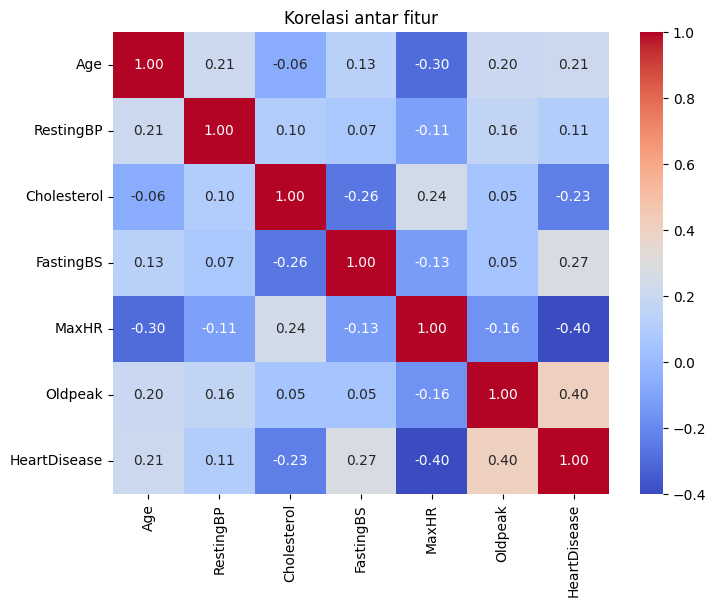

In [18]:
correlation = df.corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar fitur')
plt.show()

Oldpeak memiliki Korelasi positif yang kuat dengan penyakit jantung (0.40),
menunjukkan bahwa depresi ST yang lebih tinggi berkaitan dengan risiko penyakit jantung yang lebih tinggi.

FastingBS juga memiliki Korelasi positif sedang (0.27), menunjukkan bahwa kadar gula darah puasa yang lebih tinggi mungkin berkaitan dengan risiko penyakit jantung yang lebih tinggi.

Age dan MaxHR: Korelasi negatif (-0.30), menunjukkan bahwa detak jantung maksimum cenderung menurun seiring bertambahnya usia.

FastingBS dan Cholesterol: Korelasi positif (0.26), menunjukkan bahwa kadar gula darah puasa yang lebih tinggi mungkin berkaitan dengan kadar kolesterol yang lebih tinggi.


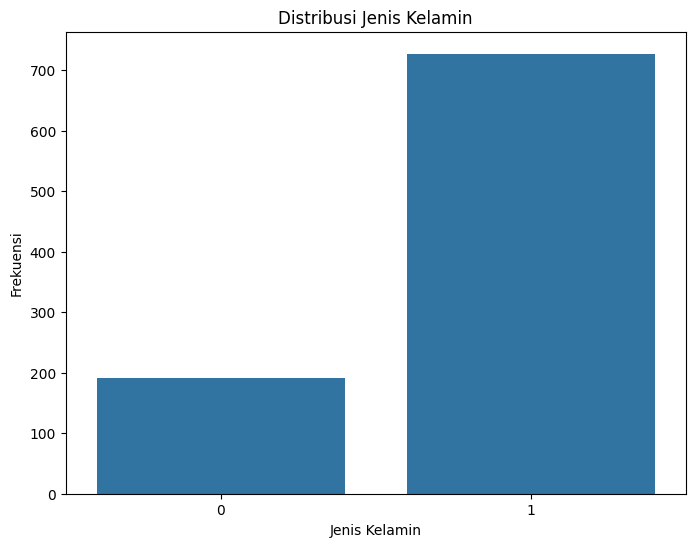

In [44]:
# Barplot untuk distribusi jenis kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df)
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Frekuensi')
plt.show()

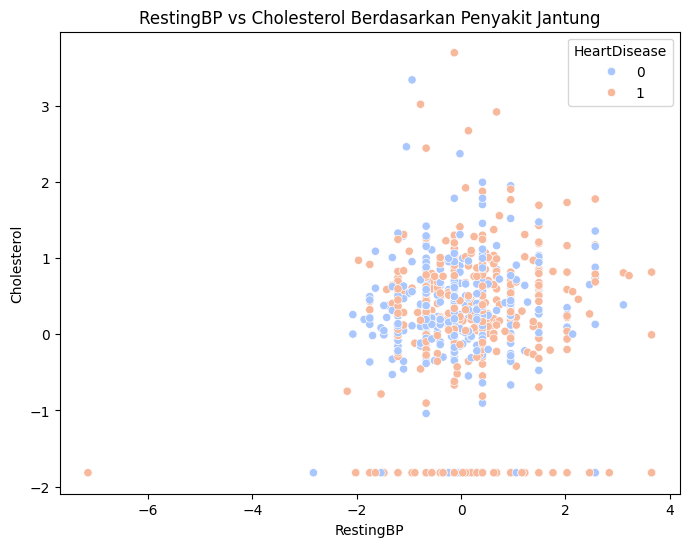

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RestingBP', y='Cholesterol', hue='HeartDisease', data=df, palette='coolwarm')
plt.title('RestingBP vs Cholesterol Berdasarkan Penyakit Jantung')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.show()

**6. Mengkonstruksi Data**

Feature enginering

In [19]:
# Menambahkan fitur baru HighCholesterol
df['HighCholesterol'] = (df['Cholesterol'] > 200).astype(int)

#Menangani nilai yang hilang untuk fitur yang baru ditambahkan
df['HighCholesterol'].fillna(0, inplace=True)

menambahkan fitur baru HighCholesterol untuk mendeteksi pasien yang mempunyai value cholestrol diatas 200mg/dl

In [20]:
# Mengubah fitur kategori menjadi numerik menggunakan LabelEncoder
categorical_features = ['Sex', 'ChestPainType', 'RestingECG',
                        'ExerciseAngina', 'ST_Slope']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HighCholesterol
0,54,1,1,140,289,0,1,172,0,0.0,2,0,1
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0
2,37,1,1,130,283,0,2,98,0,0.0,2,0,1
3,48,0,0,138,214,0,1,108,1,1.5,1,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1,0
915,57,1,0,130,131,0,1,115,1,1.2,1,1,0
916,57,0,1,130,236,0,0,174,0,0.0,1,1,1


In [21]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol',
                      'MaxHR', 'Oldpeak', 'HighCholesterol']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

fitur scaling yang digunakan adalah standarisasi untuk memastikan bahwa semua fitur dalam dataset berada dalam skala yang konsisten

**7. Menentukan Label Data**

In [22]:
# Split fitur & target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# split data pelatihan dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x = Variabel ini menyimpan data fitur (independen) dengan menghapus kolom HeartDisease dari DataFrame . Semua kolom lain di df dianggap sebagai fitur yang akan digunakan untuk memprediksi target.

y = Variabel ini menyimpan target (dependen) yaitu kolom HeartDisease. Ini adalah variabel yang ingin kita prediksi menggunakan fitur-fitur di variabel x.

test_size=0.2: Menunjukkan bahwa 20% dari data akan digunakan sebagai data uji, sedangkan 80% akan digunakan sebagai data pelatihan.
random_state=42: Menentukan seed untuk generator angka acak. Ini memastikan bahwa hasil pembagian data selalu sama setiap kali kode dijalankan.

**8. Membangun Model**

Model yang saya buat yaitu decision tree & logistic regression.

Membuat model Decision Tree dengan parameter random_state diatur ke 42 untuk memastikan hasil yang sama setiap kali kode dijalankan.

Sedangkan pada model logistic regression saya menggunakan parameter max_iter=1000 untuk memastikan model dapat melakukan iterasi yang cukup hingga menemukan solusi yang cukup baik dan random_state=42 untuk memastikan hasil yang sama setiap kali kode dijalankan.


In [23]:
# Membuat dan melatih model decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Membuat dan melatih model logistic regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# memprediksi kedua model
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

**9. Mengevaluasi hasil model**

In [24]:
# Menghitung metrik evaluasi untuk model decision tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Metrics:")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

Decision Tree Metrics:
Confusion Matrix:
 [[64 13]
 [18 89]]
Accuracy: 0.8315217391304348
Precision: 0.8725490196078431
Recall: 0.8317757009345794
F1 Score: 0.8516746411483254


In [25]:
# Menghitung metrik evaluasi untuk model logistic regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("\nLogistic Regression Metrics:")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


Logistic Regression Metrics:
Confusion Matrix:
 [[68  9]
 [20 87]]
Accuracy: 0.842391304347826
Precision: 0.90625
Recall: 0.8130841121495327
F1 Score: 0.8571428571428571


Kedua model memiliki performa yang baik untuk prediksi penyakit jantung,
namun Logistic Regression lebih unggul sedikit dalam metrik yang dievaluasi.